In [673]:
import warnings
import pandas as pd
import numpy as np

from IPython.display import IFrame
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')
import seaborn as sns

sns.set(style="whitegrid")
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.2)

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

In [674]:
#reading the dataset

df = pd.read_csv("C:/Users/sinan/Desktop/yedek dosyalar 26.03.2024/Capstone/Capstone Project EDA DataSet/Spotify_Youtube.csv")
df.head(5)

,ID,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


**Variable** -----  Description

**Track** ----- Name of the song, as visible on the Spotify platform.

**Artist** ----- Name of the artist.

**Url_spotify** ----- 	The URL of the artist.

**Album** ----- 	The album in which the song is contained on Spotify.

**Album_type** ----- 	Indicates if the song is released on Spotify as a single or contained in an album.

**Uri** ----- 	A Spotify link used to find the song through the API.

**Danceability** ----- 	Describes how suitable a track is for dancing based on a combination of musical elements.

**Energy** ----- 	Represents a perceptual measure of intensity and activity.

**Key** ----- 	The key the track is in.

**Loudness** ----- 	The overall loudness of a track in decibels (dB).

**Speechiness** ----- 	Detects the presence of spoken words in a track.

**Acousticness** ----- 	A confidence measure of whether the track is acoustic.

**Instrumentalness** ----- 	Predicts whether a track contains no vocals.

**Liveness** ----- 	Detects the presence of an audience in the recording.

**Valence** ----- 	Describes the musical positiveness conveyed by a track.

**Tempo** ----- 	The overall estimated tempo of a track in beats per minute (BPM).

**Duration_ms** ----- 	The duration of the track in milliseconds.

**Stream** ----- 	Number of streams of the song on Spotify.

**Url_youtube** ----- 	URL of the video linked to the song on YouTube.

**Title** ----- 	Title of the video clip on YouTube.

**Channel** ----- 	Name of the channel that has published the video.

**Views** ----- 	Number of views on YouTube.

**Likes** ----- 	Number of likes on YouTube.

**Comments** ----- 	Number of comments on YouTube.

**Description** ----- 	Description of the video on YouTube.

**Licensed** ----- 	Indicates whether the video represents licensed content.

**Official_video** ----- 	Boolean value indicating if the video found is the official video of the song.

In [675]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

## Data Cleaning

In [676]:
# Gazing through which columns has unique values

df.nunique()

ID                  20718
Artist               2079
Url_spotify          2079
Track               17841
Album               11932
Album_type              3
Uri                 18862
Danceability          898
Energy               1268
Key                    12
Loudness             9417
Speechiness          1303
Acousticness         3138
Instrumentalness     4012
Liveness             1536
Valence              1293
Tempo               15024
Duration_ms         14690
Url_youtube         18154
Title               18146
Channel              6714
Views               19245
Likes               17939
Comments            10485
Description         17395
Licensed                2
official_video          2
Stream              18461
dtype: int64

In [677]:
# Checking up null values

df.isna().sum()

ID                    0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64


--> There are many different columns that has many missing values.

--> I will try to fill some of the values with their respective values from their columns.

--> Nevertheless if there are unnecessary columns and rows, they will be erased.

## Fixing, erasing and dropping the missing values

--> Droping columns can be used to unnecessary columns. 

--> Erasing some rows can be done that has too many variables or some unimportant columns. 

--> Planning to fix some columns by putting the mean of the respective columns that has numeric (Float) values.

Dropping unnecessary columns: ID, Url_spotify, Uri, Danceability, Key, Url_youtube, Title, Description

Erasing rows: Channel, Views, Likes, Comments, Licensed, official_video, Stream 

Fixing columns with 'mean': Danceability, Energy, Loudness, Speechiness, 'Acousticnes','Instrumentalnes','Livenes','Valenc','Temp'  'Duration_

--> The reason why I have dropped Key column is, there are negative values which directly effects from the genre.s'

In [678]:
# Dropping columns that are unnecesarry
df = df.drop(['ID', 'Url_spotify', 'Uri', 'Key','Url_youtube', 'Title', 'Description'], axis=1)
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Channel', 'Views',
       'Likes', 'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [679]:
# Impute missing values for columns with few missing values
# Energy, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Duration_ms
columns_with_few_missing = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']
for column in columns_with_few_missing:
    df[column].fillna(df[column].mean(), inplace=True)

In [680]:
# List of columns with many missing values per rows
# Channel, Views, Likes, Comments, Licensed, official_video, Stream 
columns_with_many_missing = ['Channel', 'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream']

# Drop rows with missing values in the specified columns
for column in columns_with_many_missing:
    df.dropna(subset=[column], inplace=True)

In [681]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 19550 entries, 0 to 20717
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19550 non-null  object 
 1   Track             19550 non-null  object 
 2   Album             19550 non-null  object 
 3   Album_type        19550 non-null  object 
 4   Danceability      19550 non-null  float64
 5   Energy            19550 non-null  float64
 6   Loudness          19550 non-null  float64
 7   Speechiness       19550 non-null  float64
 8   Acousticness      19550 non-null  float64
 9   Instrumentalness  19550 non-null  float64
 10  Liveness          19550 non-null  float64
 11  Valence           19550 non-null  float64
 12  Tempo             19550 non-null  float64
 13  Duration_ms       19550 non-null  float64
 14  Channel           19550 non-null  object 
 15  Views             19550 non-null  float64
 16  Likes             19550 non-null  float64
 17

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
dtype: int64

# Descirption of statistics

In [682]:
# Inserting a function to read large number format much better. I will be using this format along the way.

def format_number(num):
    if num >= 1000000:
        return f"{num/1000000:.3f}M"
    elif num >= 1000:
        return f"{num/1000:.3f}K"
    else:
        return f"{num:.3f}"

In [683]:
df.describe().transpose().applymap(format_number)

,count,mean,std,min,25%,50%,75%,max
Danceability,19.550K,0.621,0.165,0.000,0.519,0.639,0.742,0.975
Energy,19.550K,0.635,0.214,0.000,0.508,0.666,0.797,1.000
Loudness,19.550K,-7.633,4.619,-46.251,-8.772,-6.516,-4.929,0.920
Speechiness,19.550K,0.095,0.106,0.000,0.036,0.051,0.104,0.964
Acousticness,19.550K,0.289,0.286,0.000,0.044,0.190,0.470,0.996
Instrumentalness,19.550K,0.055,0.193,0.000,0.000,0.000,0.000,1.000
Liveness,19.550K,0.191,0.165,0.015,0.094,0.125,0.234,1.000
Valence,19.550K,0.529,0.245,0.000,0.339,0.536,0.725,0.993
Tempo,19.550K,120.606,29.619,0.000,96.990,119.964,139.951,243.372
Duration_ms,19.550K,224.628K,126.909K,30.985K,180.243K,213.254K,251.911K,4.676M


In general some of the first thoughts from 19550 counted numeric data descriptions are;

--> Danceability

This value should have the direct effect to comments, views and likes metrics.
The mean as well as the other values could have positive effects to other values

--> Energy

In average of 0.62 is does mean some of the songs brings down the total up trend which is totally understandable.
The average isnt too low considering the deviation levels of differences in general.
STD does change in between 0.50 to 0.80 which means there could be very slow beat songs.

--> Loudness

The range of max and min level is quite high which tells a lot about the variety of songs within this list.
Max level could effect the metrics as well as other numeric values will do.

--> Speechiness

In average of 0.09 means there could be a lot instrumental songs or acoustic songs orvery few lyrical songs. 
The range looks quite low too.

--> Acousticness

The mean with the deviation is more or less the same so there could be a lot of ambient or other types of genres on the list.

--> Instrumentalness	

The instruments has an average near to none which mean in general it go be more digital based sounds.

--> Liveness	

Hence the other columns titles live performances has very low amount which has a deviation near to the average.

--> Valence	

The positivity is quite general but the average has 0.52 rating which could mean that there are down beat tempos too. 
It be seen that there are downbeat or not valence songs from 1st and 3rd quartiles.

--> Tempo	

It has a quite range in between 95 and 140 bpm which does mean this chart has a lot different songs in it.

--> Duration_ms	

There are many lenghts in this chart from 8minutes long to whole album longs such as 1h 15 min longs. 

--> Views--> Likes--> Comments--> Stream

All of these metrics has their own importance to evaluate the individual songs, albums or artists.

Most significant values are 8 billions view to 3 billion steams and 50 million likes to 16 million comments. 

## EDA VISUALIZATIONS

In [684]:
#Visualization
import plotly.express as px
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.subplots as sp
import plotly.graph_objs as go

#Scalign
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [685]:
# Calculate descriptive statistics
df2 = df.copy()

# Take only the numeric columns
numeric_columns = df2.select_dtypes(include=[np.number]).columns.tolist()
descriptive_stats = df2[numeric_columns].describe()
descriptive_stats

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,19550.000000,19550.000000,19550.000000,19550.000000,19550.000000,19550.000000,19550.000000,19550.000000,19550.000000,1.955000e+04,1.955000e+04,1.955000e+04,1.955000e+04,1.955000e+04
mean,0.621059,0.635170,-7.633181,0.095392,0.289106,0.055292,0.191227,0.528950,120.605704,2.246281e+05,9.545249e+07,6.700229e+05,2.786268e+04,1.371088e+08
std,0.165485,0.213549,4.618721,0.106241,0.285901,0.192514,0.165193,0.245222,29.618583,1.269093e+05,2.775678e+08,1.805012e+06,1.959025e+05,2.463527e+08
min,0.000000,0.000020,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.519000,0.508000,-8.771750,0.035700,0.044400,0.000000,0.094000,0.339000,96.990250,1.802432e+05,1.911615e+06,2.238125e+04,5.312500e+02,1.781149e+07
50%,0.639000,0.666000,-6.516000,0.050700,0.190000,0.000002,0.125000,0.536000,119.964000,2.132535e+05,1.491456e+07,1.279185e+05,3.344000e+03,4.979139e+07
75%,0.742000,0.797000,-4.929250,0.104000,0.470000,0.000434,0.234000,0.725000,139.950500,2.519110e+05,7.152293e+07,5.265902e+05,1.449300e+04,1.390790e+08
max,0.975000,1.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


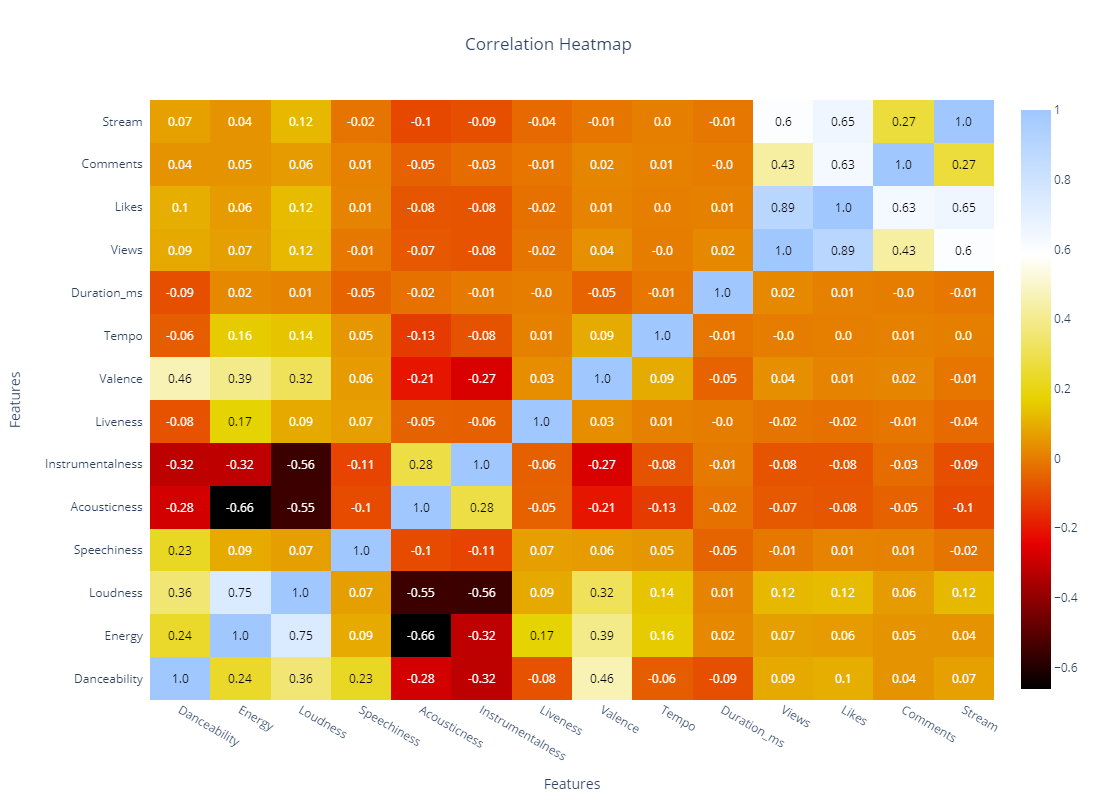

In [686]:
# Calculate correlations
correlations = df2[numeric_columns].corr()

# Create a correlation heatmap with custom appearance
fig = ff.create_annotated_heatmap(
    z=correlations.values,
    x=numeric_columns,
    y=numeric_columns,
    annotation_text=correlations.round(2).values,
    colorscale='Blackbody',
    showscale=True,
    hoverinfo='z'
)

# Customize the appearance
fig.update_xaxes(title_text='Features', side='bottom')
fig.update_yaxes(title_text='Features', side='left')

# Update layout 
fig.update_layout(
    title='Correlation Heatmap',
    title_x=0.5,
    width=1000,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    margin=dict(l=150, r=100, t=100, b=100)
)


# Display the heatmap using  the 
pyo.iplot(fig)

--> some of the correlations has seen from this heat map. 
--
--> Danceability, Energy, Loudness, Valence, Tempo has effects on views, likes, comments and streams on 2 platforms.
--
--

In [687]:
# Album type counts has been taken

album_type_count = df['Album_type'].value_counts()
print(album_type_count)

Album_type
album          14149
single          4689
compilation      712
Name: count, dtype: int64


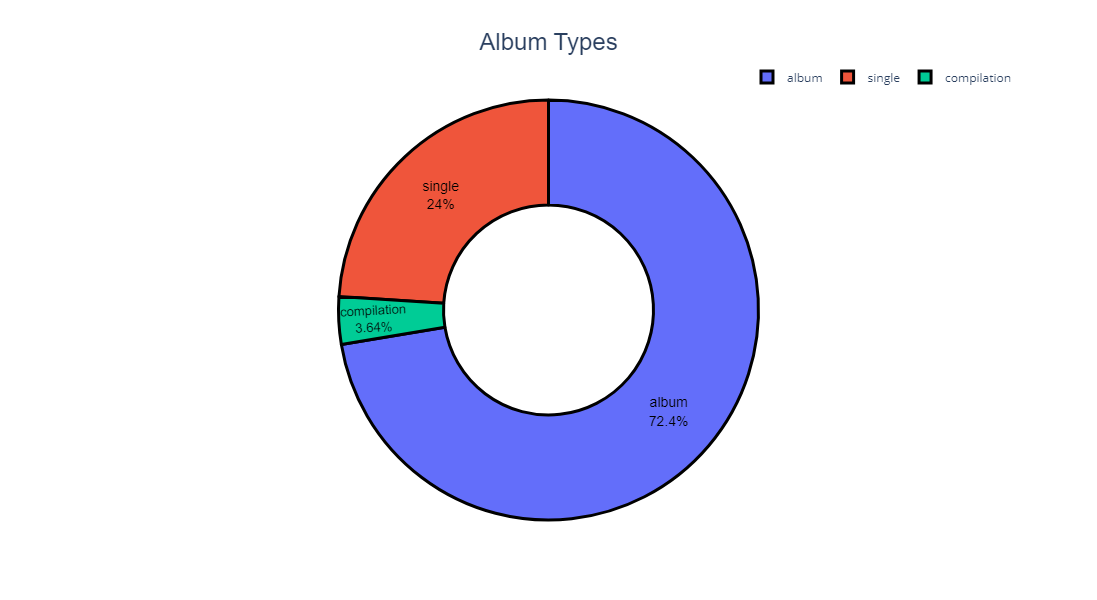

In [688]:
labels = album_type_count.index.tolist()
sizes = album_type_count.values.tolist()

fig1 = px.pie(values=sizes, names=labels, title='Album Types', 
             labels={'names': 'Album Types'}, 
             template='plotly_white', 
             hole=0.5)

fig1.update_traces(textinfo='percent+label', textposition='inside', 
                  marker=dict(line=dict(color='#000000', width=3)),
                  textfont=dict(size=14, color='black', family='Arial, bold'))

fig1.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  title_font=dict(size=24, family="Arial"),
                  legend_title_font=dict(size=18, family="Arial"),
                  title_x=0.5,
                  width=800,
                  height=600)

fig1.show()

In [689]:
Licensed_count = df['Licensed'].value_counts()
print(Licensed_count)

Licensed
True     13728
False     5822
Name: count, dtype: int64


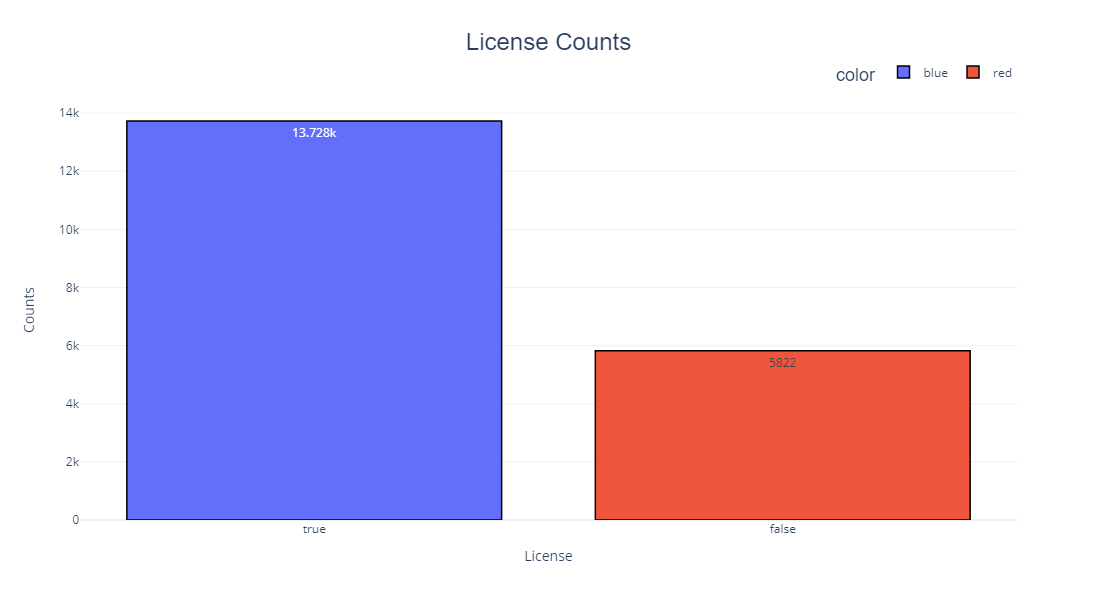

In [690]:
Licensed = Licensed_count.index.tolist()
Not_Licensed = Licensed_count.values.tolist()

fig2 = px.bar(x=Licensed, y=Not_Licensed, title='License Counts', 
             labels={'x': 'License', 'y': 'Counts'}, 
             template='plotly_white',
             color=['blue' if value else 'red' for value in Licensed_count.index])

fig2.update_traces(texttemplate='%{y}', textposition='inside', 
                  marker_line_color='black', marker_line_width=1.5)

fig2.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  title_font=dict(size=24, family="Arial"),
                  legend_title_font=dict(size=18, family="Arial"),
                  title_x=0.5,
                  width=800,
                  height=600)

fig2.show()

In [691]:
official_video_count = df['official_video'].value_counts()
print(official_video_count)

official_video
True     15261
False     4289
Name: count, dtype: int64


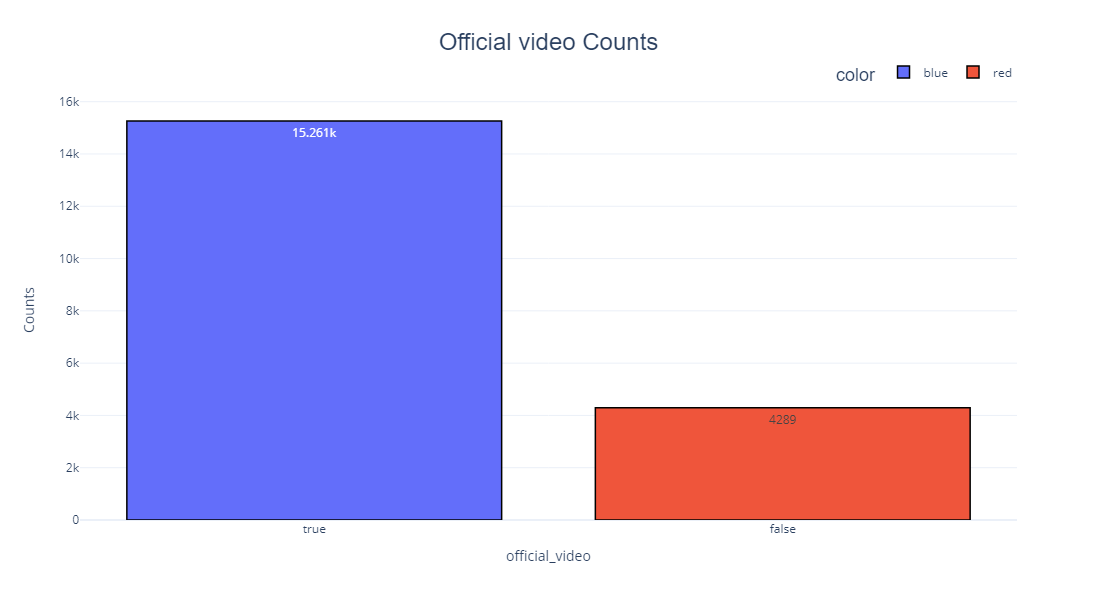

In [692]:
official_video = official_video_count.index.tolist()
Not_official_video = official_video_count.values.tolist()

fig3 = px.bar(x=official_video, y=Not_official_video, title='Official video Counts', 
             labels={'x': 'official_video', 'y': 'Counts'}, 
             template='plotly_white',
             color=['blue' if value else 'red' for value in Licensed_count.index])

fig3.update_traces(texttemplate='%{y}', textposition='inside', 
                  marker_line_color='black', marker_line_width=1.5)

fig3.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  title_font=dict(size=24, family="Arial"),
                  legend_title_font=dict(size=18, family="Arial"),
                  title_x=0.5,
                  width=800,
                  height=600)

fig3.show()

In [693]:
# Group the songs by artist and views - youtube, stream - spotify
artist_grouped = df.groupby('Artist')[['Views', 'Stream']].sum()

# Sort the artists by the sum of views and streams in descending order
artist_sorted = artist_grouped.sort_values(['Views', 'Stream'], ascending=False)

# Get the top 10 artists with the most number of views on YouTube and streams on Spotify
top_10 = artist_sorted.head(10)

top_10

,Views,Stream
Artist,,
Ed Sheeran,1.546021e+10,1.439488e+10
CoComelon,1.460167e+10,3.690822e+08
Katy Perry,1.312063e+10,6.607329e+09
Charlie Puth,1.216759e+10,7.041187e+09
Luis Fonsi,1.162811e+10,5.054326e+09
Justin Bieber,1.099106e+10,1.209777e+10
Daddy Yankee,1.087193e+10,5.135462e+09
Bruno Mars,1.024092e+10,1.089786e+10
Macklemore & Ryan Lewis,1.012206e+10,3.982978e+09


In [694]:
# Create two separate Series for views and streams
df_views = df.groupby('Artist')['Views'].sum().sort_values(ascending=False)[:10]
df_streams = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False)[:10]

# Apply the format_number function to each element in the Series
formatted_df_views = df_views.apply(format_number)
formatted_df_streams = df_streams.apply(format_number)

In [695]:
formatted_df_views

Artist
Ed Sheeran                 15460.208M
CoComelon                  14601.671M
Katy Perry                 13120.632M
Charlie Puth               12167.594M
Luis Fonsi                 11628.113M
Justin Bieber              10991.060M
Daddy Yankee               10871.927M
Bruno Mars                 10240.919M
Macklemore & Ryan Lewis    10122.056M
Coldplay                    9997.278M
Name: Views, dtype: object

In [696]:
formatted_df_streams

Artist
Post Malone        15251.264M
Ed Sheeran         14394.882M
Dua Lipa           13408.076M
The Weeknd         12464.283M
Justin Bieber      12097.767M
XXXTENTACION       12011.910M
Imagine Dragons    11858.311M
Coldplay           11778.478M
Khalid             11386.840M
Bruno Mars         10897.863M
Name: Stream, dtype: object

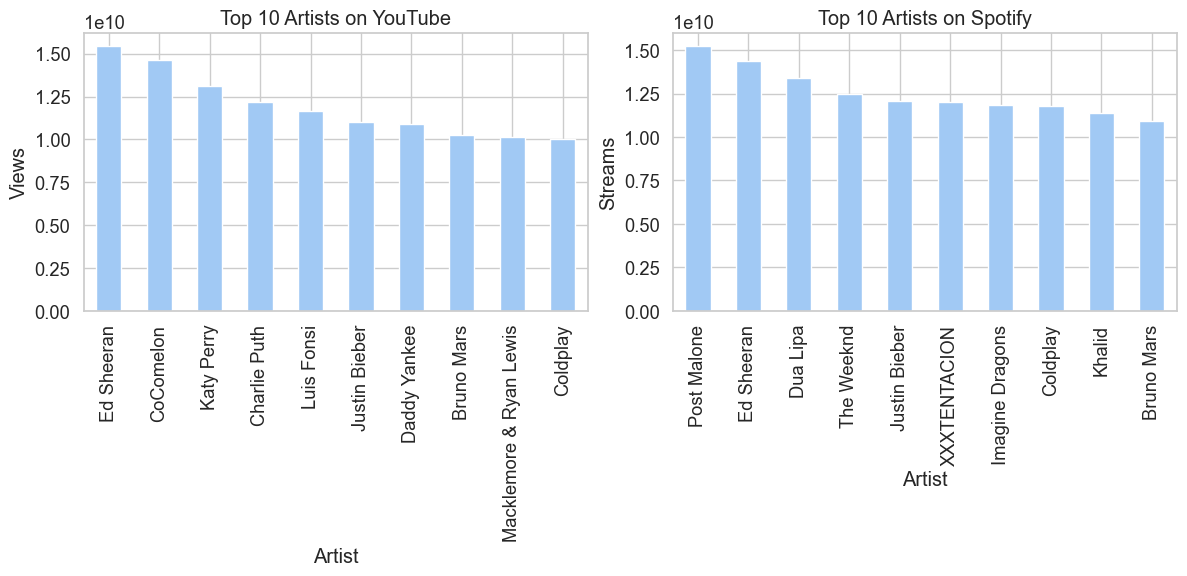

In [697]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# top 10 yt
ax1.set_title('Top 10 Artists on YouTube')
df_views.plot(kind='bar', ax=ax1)

# top 10 spotofy
ax2.set_title('Top 10 Artists on Spotify')
df_streams.plot(kind='bar', ax=ax2)


ax1.set_xlabel('Artist')
ax1.set_ylabel('Views')
ax2.set_xlabel('Artist')
ax2.set_ylabel('Streams')
fig.tight_layout()
plt.show()

In [698]:
top10_views = df.nlargest(12, 'Views').drop_duplicates(subset='Track')

top10_comments = df.nlargest(12, 'Comments').drop_duplicates(subset='Track')

top10_likes = df.nlargest(14, 'Likes').drop_duplicates(subset='Track')

# After checking dublicated row I have changed the number of values accordingly in the code area in order to have 10 tracks

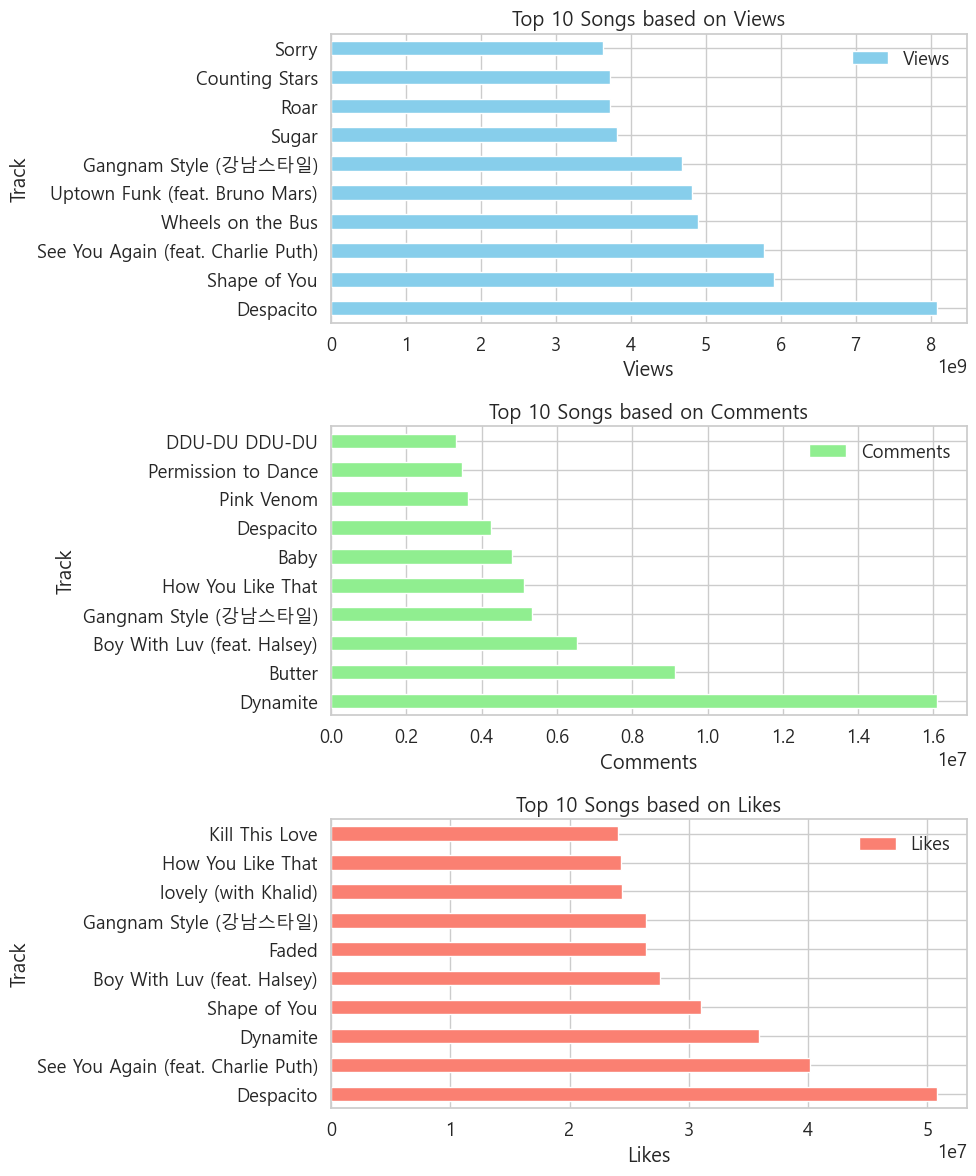

In [699]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

top10_views.plot(kind='barh', x='Track', y='Views', ax=axs[0], color='skyblue')
axs[0].set_title('Top 10 Songs based on Views')
axs[0].set_xlabel('Views')

top10_comments.plot(kind='barh', x='Track', y='Comments', ax=axs[1], color='lightgreen')
axs[1].set_title('Top 10 Songs based on Comments')
axs[1].set_xlabel('Comments')

top10_likes.plot(kind='barh', x='Track', y='Likes', ax=axs[2], color='salmon')
axs[2].set_title('Top 10 Songs based on Likes')
axs[2].set_xlabel('Likes')

plt.tight_layout()

plt.show()


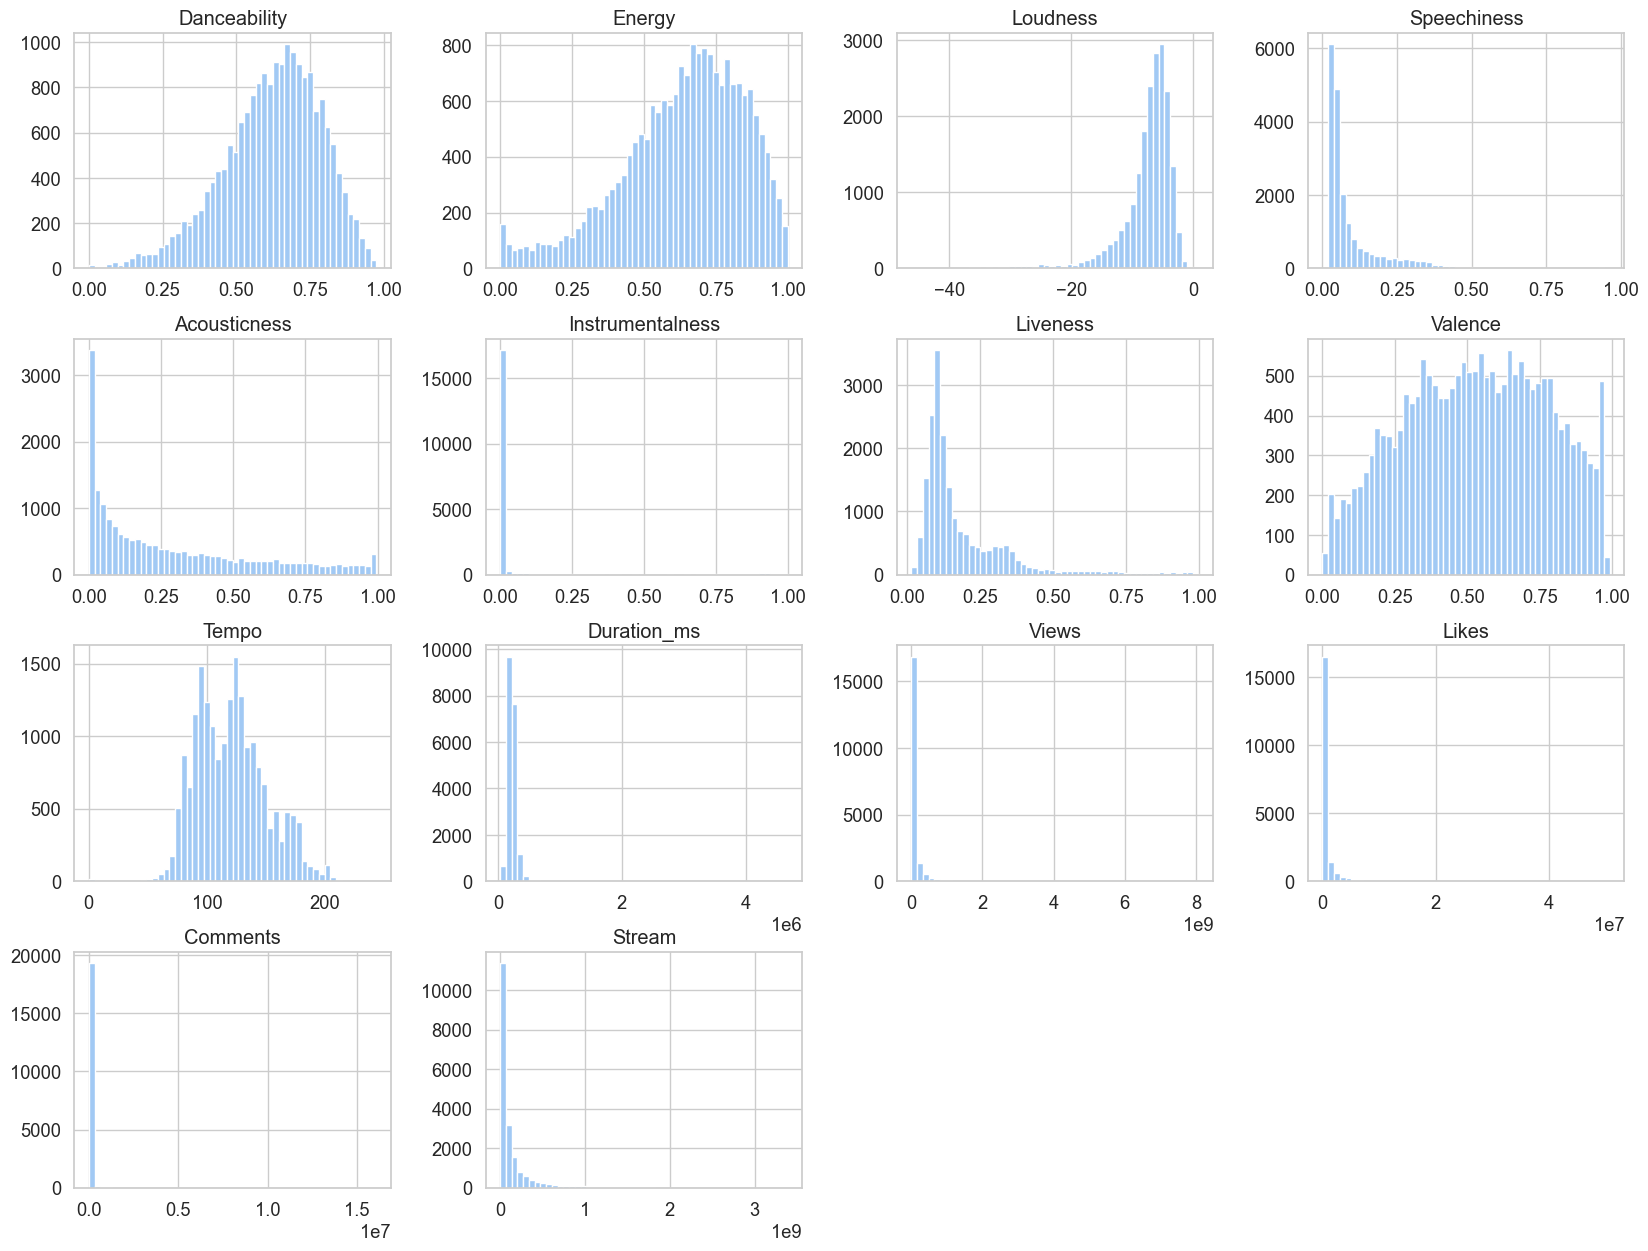

In [700]:
# I have created a bar chart to see where are all the information scewed to. 
# The information what I want to have is where the mode is location within each columns.

plt.rcParams['font.family'] = 'Arial'

numeric_cols.hist(bins=50, figsize=(20,15))
plt.show()

--> Danceability, Energy, Loudness, Valence, tempo has been seen to be different then the other with their ratings and their bar skews.

--> It is easy to see that Danceability, Energy, Loudness are left skewed which indicates where are all the information piled to. 

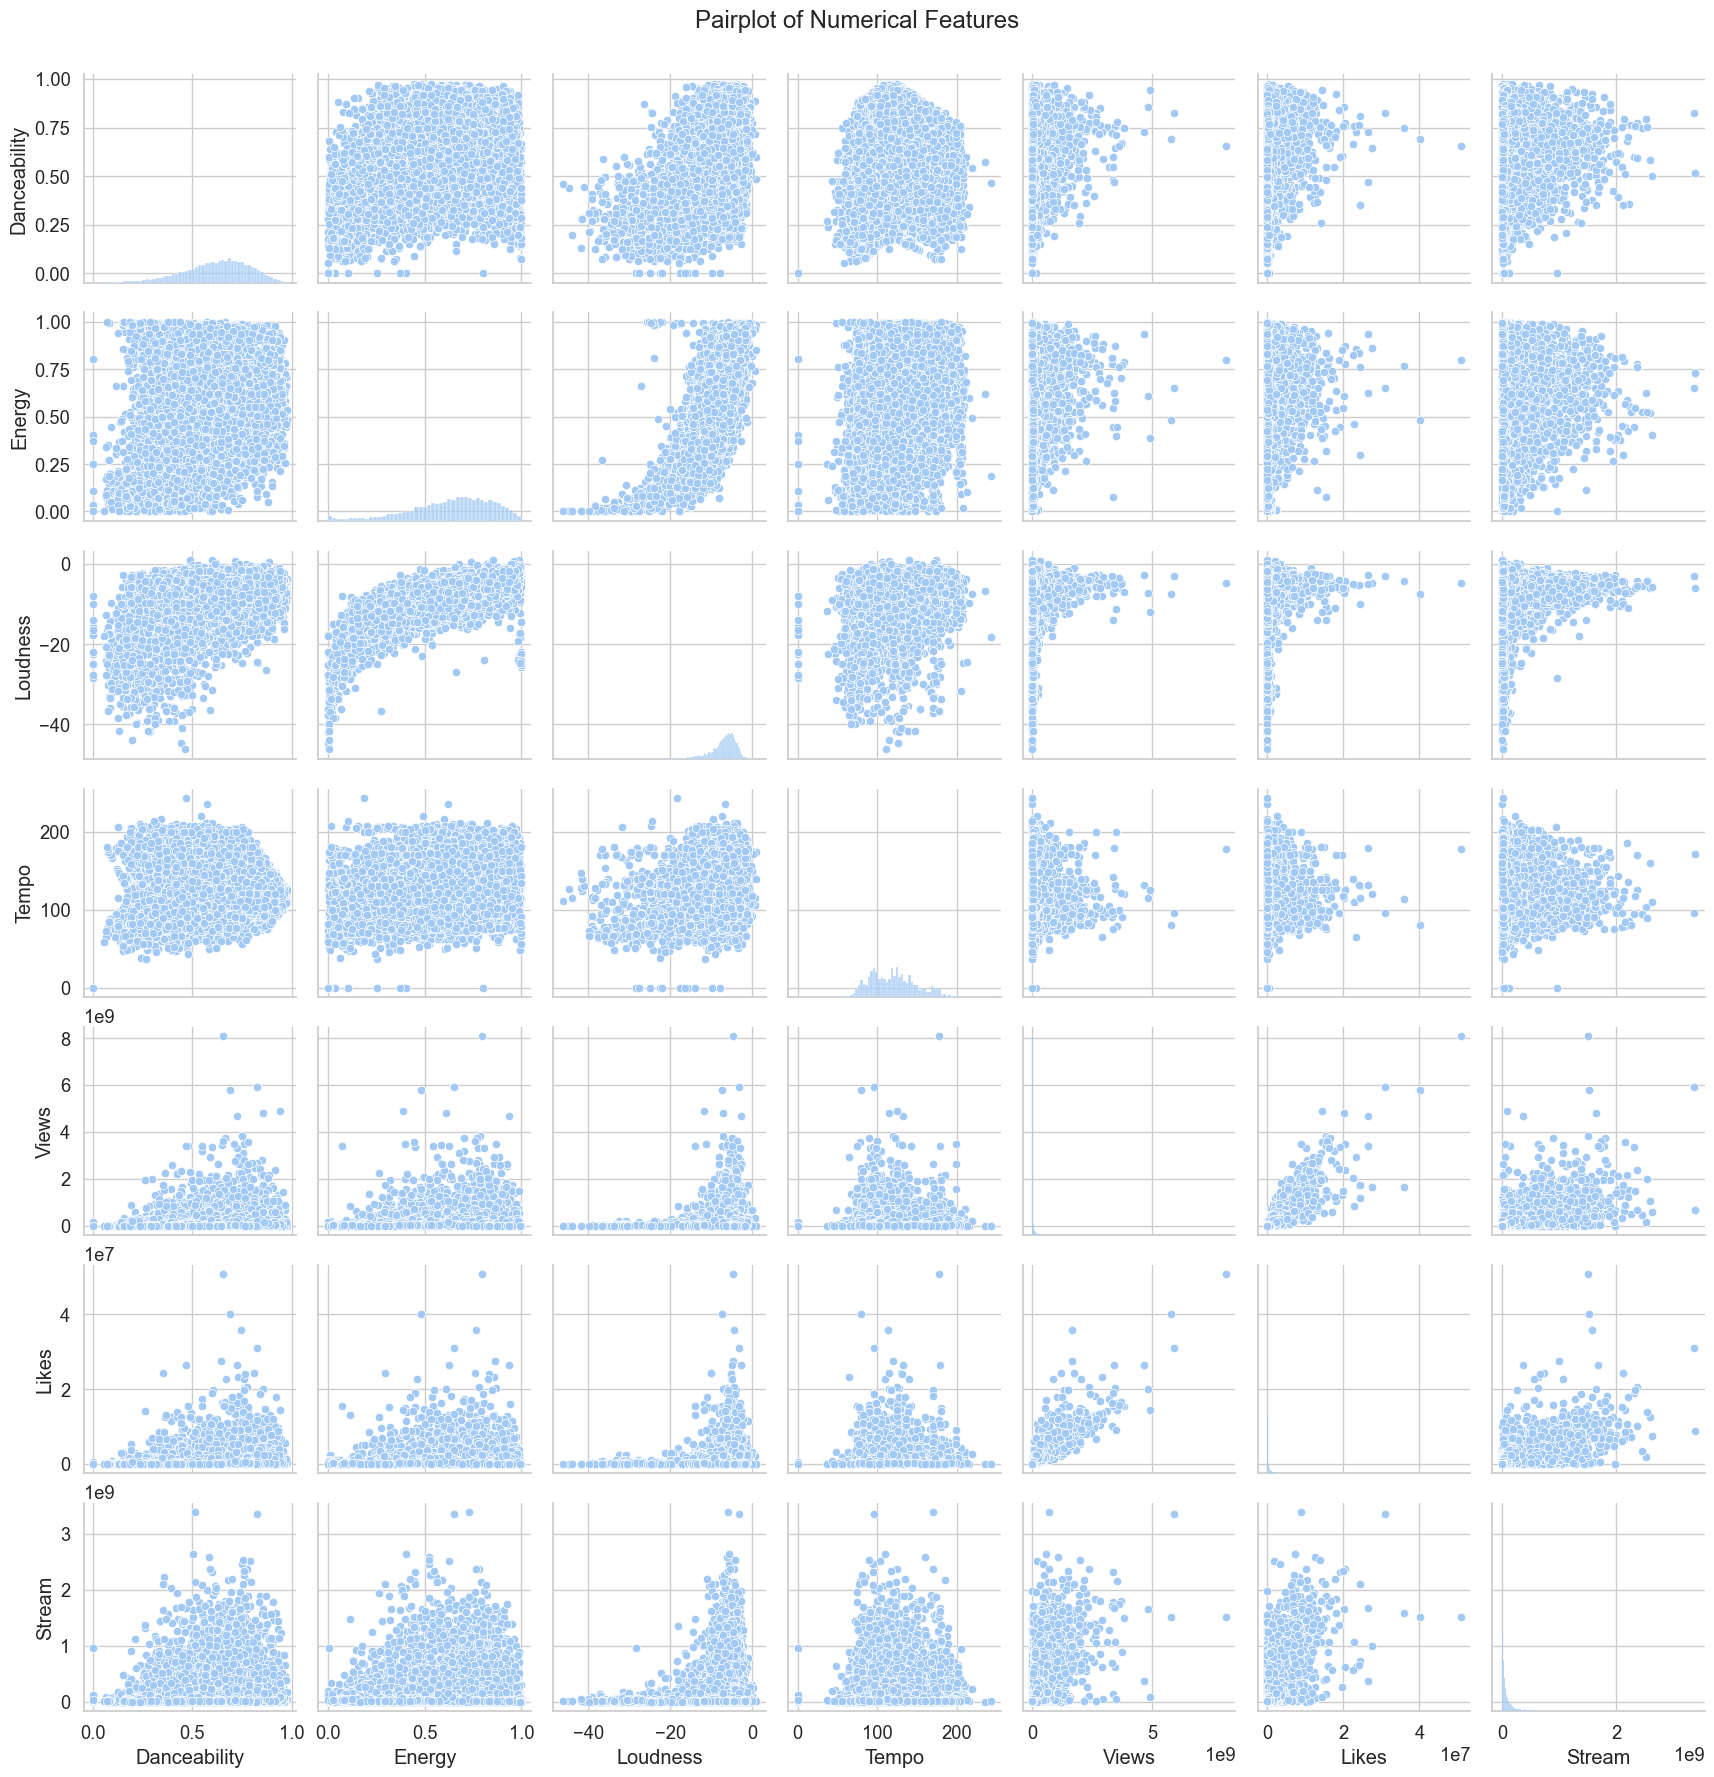

In [701]:
# I have selected especially specific metrics to see the realiton on scatter plot
numerical_features2 = ['Danceability', 'Energy', 'Loudness', 'Tempo', 'Views', 'Likes', 'Stream']

plt.rcParams['font.family'] = 'Arial'

sns.pairplot(df[numerical_features2])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

--> It has been mentioned before but it is now obvious from the upper graph that Danceability, Energy, Loudness, tempo has effects on views and streams. 
--

In [702]:
top_youtube_songs = df.sort_values('Views', ascending=False).head(30)
top_youtube_songs[['Artist', 'Track', 'Danceability', 'Energy', 'Loudness', 'Views']]

,Artist,Track,Danceability,Energy,Loudness,Views
1147,Luis Fonsi,Despacito,0.655,0.7970,-4.787,8.079649e+09
365,Daddy Yankee,Despacito,0.655,0.7970,-4.787,8.079647e+09
12452,Ed Sheeran,Shape of You,0.825,0.6520,-3.183,5.908398e+09
14580,Charlie Puth,See You Again (feat. Charlie Puth),0.689,0.4810,-7.503,5.773798e+09
12469,Wiz Khalifa,See You Again (feat. Charlie Puth),0.689,0.4810,-7.503,5.773797e+09
20303,CoComelon,Wheels on the Bus,0.941,0.3870,-11.920,4.898831e+09
10686,Mark Ronson,Uptown Funk (feat. Bruno Mars),0.856,0.6090,-7.223,4.821016e+09
8937,PSY,Gangnam Style (강남스타일),0.727,0.9370,-2.871,4.679767e+09
9569,Maroon 5,Sugar,0.748,0.7880,-7.055,3.817733e+09
13032,Katy Perry,Roar,0.671,0.7710,-4.821,3.725749e+09


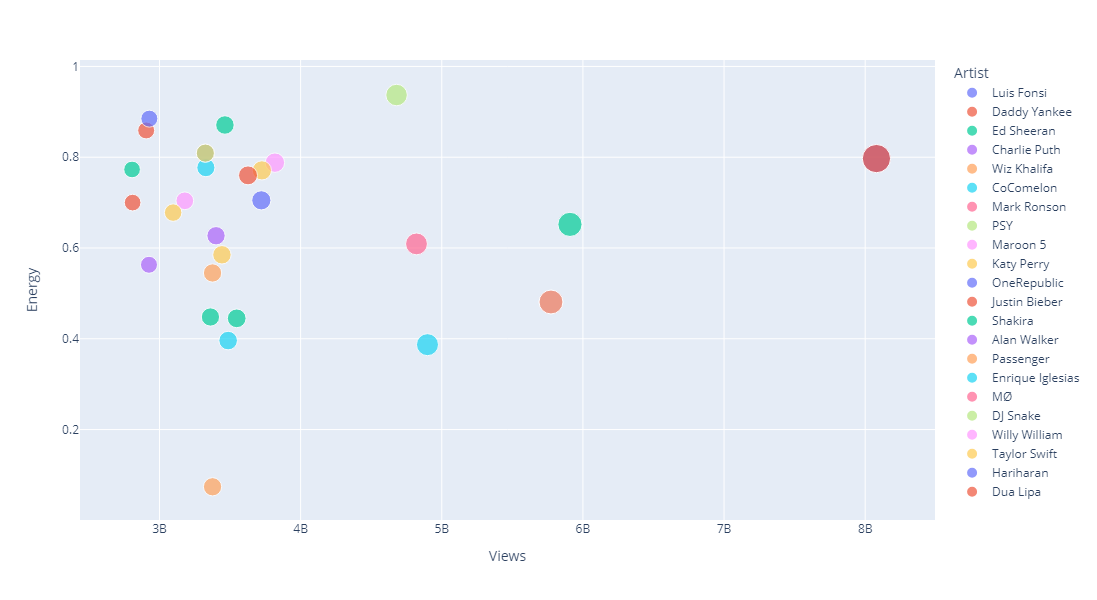

In [703]:
fig4 = px.scatter(top_youtube_songs, x="Views", y="Energy", color="Artist",
                 size='Views', hover_data=['Danceability', 'Loudness', 'Track'],height=600, width=800)
fig4.show()

In [704]:
top_spotify_songs = df.sort_values('Stream', ascending=False).head(30)
top_spotify_songs[['Artist', 'Track', 'Energy', 'Danceability', 'Tempo', 'Stream']]

,Artist,Track,Energy,Danceability,Tempo,Stream
15250,The Weeknd,Blinding Lights,0.730,0.514,171.005,3.386520e+09
12452,Ed Sheeran,Shape of You,0.652,0.825,95.977,3.362005e+09
19186,Lewis Capaldi,Someone You Loved,0.405,0.501,109.891,2.634013e+09
17937,Post Malone,rockstar (feat. 21 Savage),0.520,0.585,159.801,2.594927e+09
17938,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,0.522,0.755,89.960,2.538330e+09
17445,Swae Lee,Sunflower - Spider-Man: Into the Spider-Verse,0.522,0.755,89.960,2.538330e+09
13503,Drake,One Dance,0.625,0.792,103.967,2.522432e+09
16028,Halsey,Closer,0.524,0.748,95.010,2.456205e+09
16099,The Chainsmokers,Closer,0.524,0.748,95.010,2.456205e+09
14030,Imagine Dragons,Believer,0.780,0.776,124.949,2.369272e+09


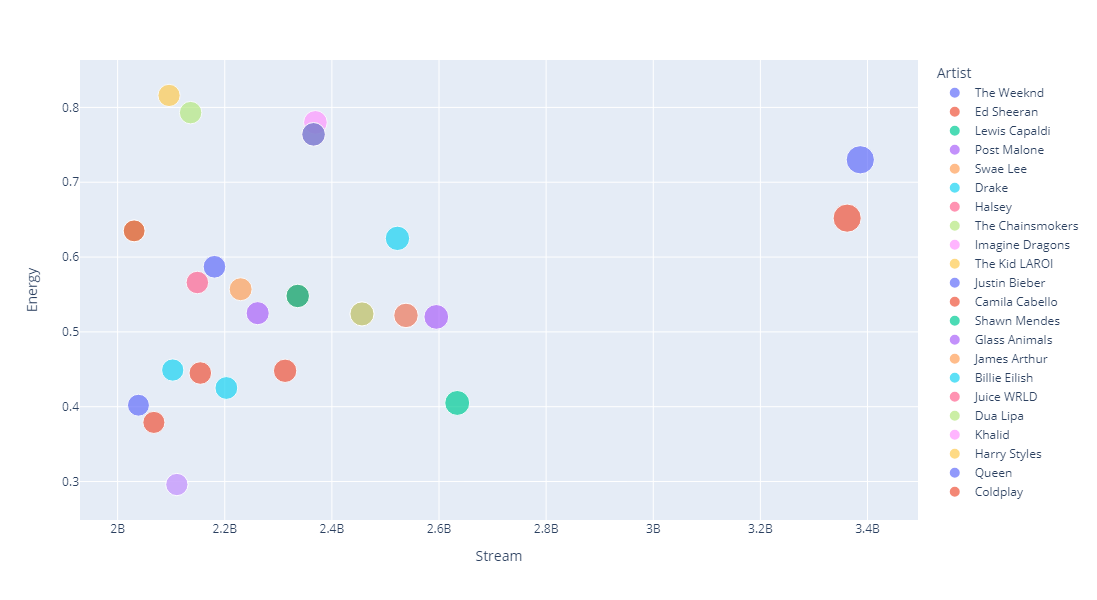

In [705]:
fig5 = px.scatter(top_spotify_songs, x="Stream", y="Energy", color="Artist",
                 size='Stream', hover_data=['Danceability', 'Loudness', 'Track'],height=600, width=800)
fig5.show()

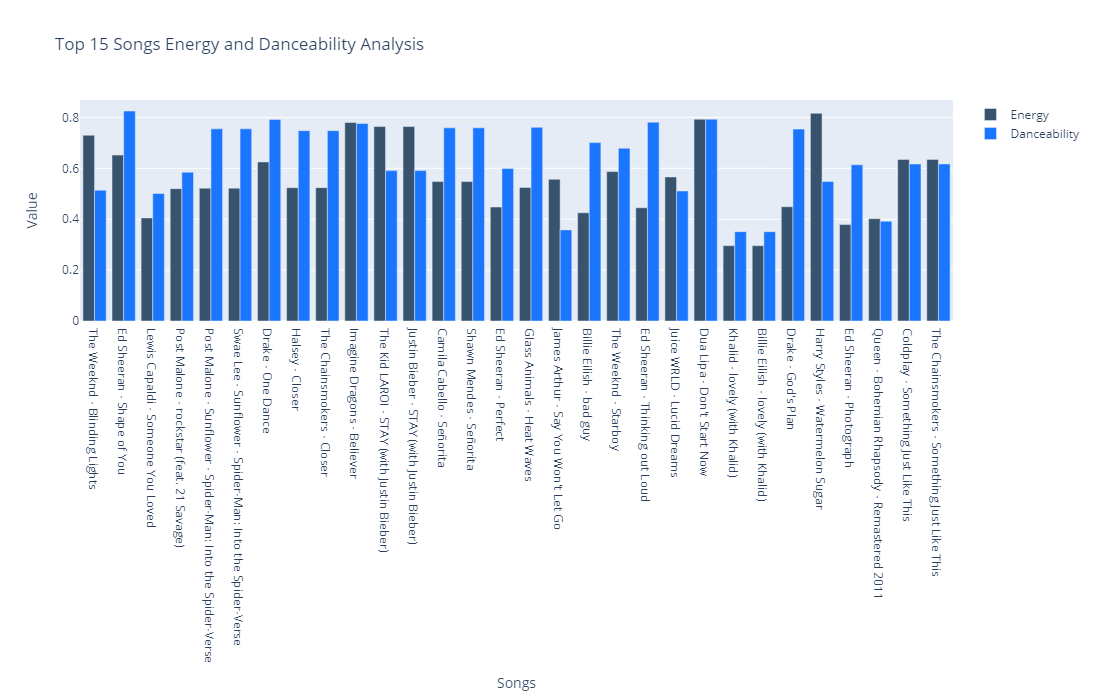

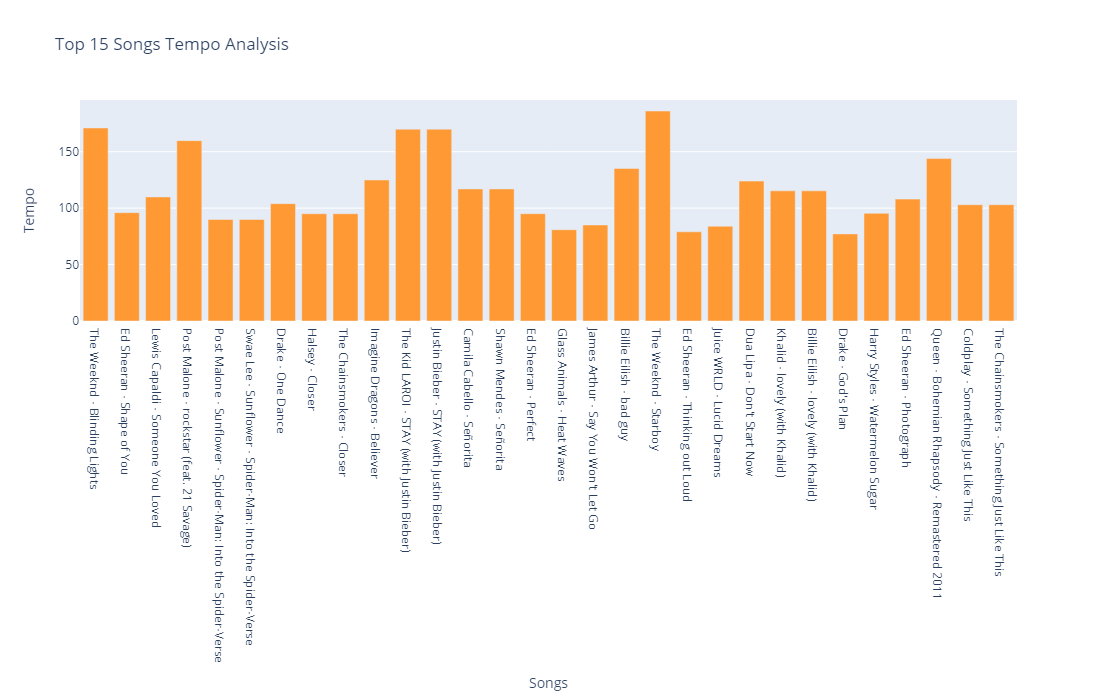

In [706]:
# Extra metric look ups
top_spotify_songs = df.sort_values('Stream', ascending=False).head(30)
top_spotify_songs[['Artist', 'Track', 'Energy', 'Danceability', 'Tempo', 'Stream']]

artist = top_spotify_songs['Artist'].values
songs = top_spotify_songs['Track'].values
energy = top_spotify_songs['Energy'].values
danceability = top_spotify_songs['Danceability'].values
tempo = top_spotify_songs['Tempo'].values

fig6 = go.Figure()

fig6.add_trace(go.Bar(
    x=[f"{artist[i]} - {songs[i]}" for i in range(len(songs))],  # Combine artist and song for label
    y=energy,
    name='Energy',
    marker_color='rgb(55, 83, 109)'
))

fig6.add_trace(go.Bar(
    x=[f"{artist[i]} - {songs[i]}" for i in range(len(songs))],  # Combine artist and song for label
    y=danceability,
    name='Danceability',
    marker_color='rgb(26, 118, 255)'
))

# Adding title and labels
fig6.update_layout(
    title='Top 15 Songs Energy and Danceability Analysis',
    xaxis=dict(title='Songs'),
    yaxis=dict(title='Value'),
    barmode='group',  # Group the bars
    height=700  # Adjust the height here
)

# Creating the bar graph for Tempo
fig7 = go.Figure()

fig7.add_trace(go.Bar(
    x=[f"{artist[i]} - {songs[i]}" for i in range(len(songs))],  # Combine artist and song for label
    y=tempo,
    name='Tempo',
    marker_color='rgb(255, 153, 51)'
))

# Adding title and labels
fig7.update_layout(
    title='Top 15 Songs Tempo Analysis',
    xaxis=dict(title='Songs'),
    yaxis=dict(title='Tempo'),
    height=700  # Adjust the height here
)

# Show the plots
fig6.show()
fig7.show()

## This EDA can be elaborated but currently it is enough to see relations in between metrics and its objects.